# Dask Dataframe

- Distributed pandas-like dataframes, for efficient handling of tabular, organized data
- Scales well for large data sets

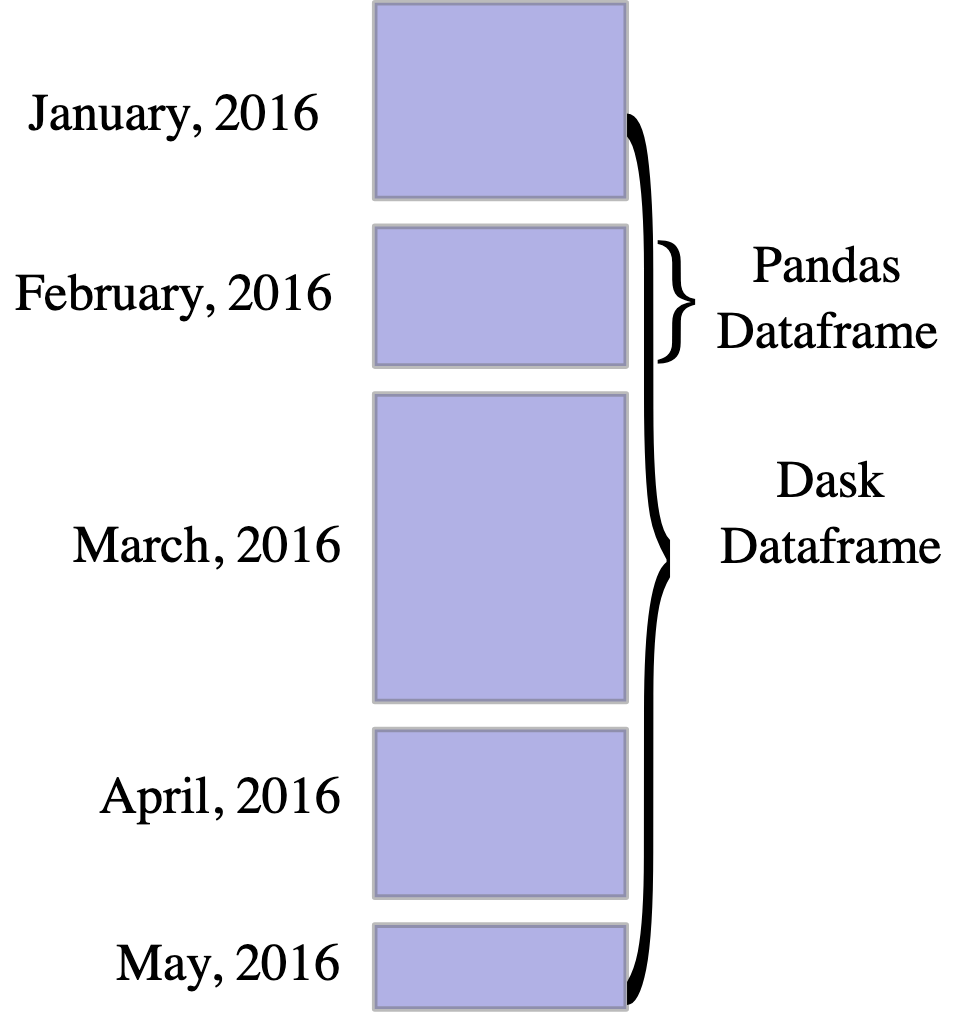

In [1]:
# Importing dask dataframe
import dask
import dask.dataframe as dd
dask.__version__

'2.30.0'

In [2]:
# Importing pandas, numpy, sys, gc, and time 
import numpy as np
import pandas as pd
import gc
import time
import sys
%load_ext memory_profiler

In [3]:
# Get the file size
import os
file = os.path.getsize("./Data/huge_data.csv")
print ('File size  {}'.format(file/1024/1024/1024), "GB")

File size  1.2887158999219537 GB


In [12]:
%%time
# Measure time and memory to read the data from csv into pandas dataframe
p_df = pd.read_csv('./Data/huge_data.csv')
%memit p_df = pd.read_csv('./Data/huge_data.csv')

peak memory: 6091.59 MiB, increment: 2989.76 MiB
CPU times: user 18.5 s, sys: 3.85 s, total: 22.3 s
Wall time: 22.6 s


In [5]:
%%time
# Measure time and memory to read the data from csv into pandas dataframe
%memit d_df = dd.read_csv('./Data/huge_data.csv')

peak memory: 2800.64 MiB, increment: 1.01 MiB
CPU times: user 67.4 ms, sys: 116 ms, total: 183 ms
Wall time: 372 ms


In [6]:
print("Mem used by dask dataframe ", sys.getsizeof(d_df)/(1024*1024*1024), "GB")
print("Mem used by pandas dataframe ", sys.getsizeof(p_df)/(1024*1024*1024), "GB")

Mem used by dask dataframe  4.470348358154297e-08 GB
Mem used by pandas dataframe  1.6950072199106216 GB


In [13]:
del p_df

In [8]:
d_df.head(1)

,Unnamed: 0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,0,32868600,92560455,88855400,81959895,79434358,80039436,72163981,92149548,39866455,42413603,99474905,70923960,40371676,90572320,VO4fz


In [9]:
#%%time
#pandasFile_tmp = pd.read_csv('huge_data.csv')
#for i in range(3):
#    pandasFile = pandasFile.append(pandasFile_tmp)
#pandasFile.shape

In [10]:
%%time
%memit d_df_tmp = dd.read_csv('./Data/huge_data.csv')
%memit d_df_final = d_df.append(d_df_tmp)

peak memory: 1188.77 MiB, increment: 0.02 MiB
peak memory: 1188.84 MiB, increment: 0.07 MiB
CPU times: user 114 ms, sys: 128 ms, total: 242 ms
Wall time: 591 ms


In [11]:
%memit print( "rows = ", len(d_df), "Columns = ", len(d_df.columns)) 
%memit print( "rows = ", len(d_df_final), "Columns = ", len(d_df_final.columns))


rows =  10000000 Columns =  16
peak memory: 5810.93 MiB, increment: 4622.08 MiB
rows =  20000000 Columns =  16
peak memory: 5821.34 MiB, increment: 4488.03 MiB


## Summary
- In comparison to pandas dataframe, Dask dataframe is more efficient in terms of speed and memory